# Visualize Polygon-Based OpenContrails Dataset

In [1]:
import matplotlib.pyplot as plt
import random
import cv2
import torch
import os
import sys
sys.path.append('/home/irortiza/Documents/TESIS/contrails_detection/E-contrail/detectron2')
import detectron2
!nvcc --version
from detectron2.utils.visualizer import Visualizer
import tifffile
import os
import requests
import zipfile

from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0


## 1. Download ZIP Dataset from Zenodo

In [3]:

ZENODO_ZIP_URL = "https://zenodo.org/records/17630432/files/opencontrails_polygons.zip"
zip_filename = "opencontrails_polygons.zip"
unzipped_folder = "opencontrails_polygons"   # adjust if needed

# ------------------------------------
# Check if dataset is already extracted
# ------------------------------------
if os.path.isdir(unzipped_folder):
    print(f"Dataset already exists in '{unzipped_folder}'. Skipping download and unzip.")
else:
    # ------------------------------------
    # Download ZIP only if it doesn't exist
    # ------------------------------------
    if os.path.isfile(zip_filename):
        print(f"ZIP file '{zip_filename}' already exists. Skipping download.")
    else:
        print(f"Downloading dataset from {ZENODO_ZIP_URL} ...")
        with requests.get(ZENODO_ZIP_URL, stream=True) as r:
            r.raise_for_status()
            with open(zip_filename, "wb") as f:
                for chunk in r.iter_content(chunk_size=8192):
                    if chunk:
                        f.write(chunk)
        print(f"Saved to {zip_filename}")

    # ------------------------
    # Unzip the dataset
    # ------------------------
    print(f"Unzipping '{zip_filename}' ...")
    with zipfile.ZipFile(zip_filename, "r") as zip_ref:
        zip_ref.extractall(".")
    print(f"Extracted to '{unzipped_folder}'")


Saved to opencontrails_polygons.zip
Unzipping 'opencontrails_polygons.zip' ...
Extracted to 'opencontrails_polygons'


In [4]:

#    Here we assume it unpacks to ./oc_MRCNN_format/oc_mrcnn/...
dataset_root = "./opencontrails_polygons"

train_json = os.path.join(dataset_root, "train", "annotations", "instances_train.json")
train_images = os.path.join(dataset_root, "train", "images")

val_json = os.path.join(dataset_root, "validation", "annotations", "instances_val.json")
val_images = os.path.join(dataset_root, "validation", "images")

print("Train JSON:", train_json)
print("Train images:", train_images)
print("Val JSON:", val_json)
print("Val images:", val_images)


Train JSON: ./opencontrails_polygons/train/annotations/instances_train.json
Train images: ./opencontrails_polygons/train/images
Val JSON: ./opencontrails_polygons/validation/annotations/instances_val.json
Val images: ./opencontrails_polygons/validation/images


## 4. Register datasets in Detectron2

In [5]:

register_coco_instances("my_dataset_train", {}, train_json, train_images)
register_coco_instances("my_dataset_val", {}, val_json, val_images)

metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")
print(dataset_dicts[0])


{'file_name': './opencontrails_polygons/train/images/7837835140118832722.png', 'height': 256, 'width': 256, 'image_id': '0', 'annotations': [{'iscrowd': 0, 'bbox': [232.0, 172.0, 16.0, 32.0], 'category_id': 0, 'segmentation': [[237.0, 187.0, 237.0, 186.0, 236.0, 185.0, 235.0, 183.0, 236.0, 184.0, 234.0, 181.0, 235.0, 182.0, 234.0, 180.0, 233.0, 178.0, 232.0, 176.0, 234.0, 179.0, 233.0, 177.0, 232.0, 175.0, 232.0, 174.0, 232.0, 173.0, 233.0, 173.0, 233.0, 172.0, 234.0, 172.0, 235.0, 173.0, 235.0, 172.0, 236.0, 174.0, 236.0, 173.0, 237.0, 176.0, 237.0, 175.0, 238.0, 178.0, 238.0, 177.0, 239.0, 181.0, 239.0, 180.0, 239.0, 179.0, 240.0, 182.0, 240.0, 183.0, 241.0, 184.0, 241.0, 185.0, 242.0, 186.0, 242.0, 187.0, 242.0, 188.0, 243.0, 189.0, 243.0, 190.0, 244.0, 191.0, 244.0, 192.0, 245.0, 193.0, 245.0, 194.0, 246.0, 196.0, 245.0, 195.0, 247.0, 198.0, 246.0, 197.0, 248.0, 200.0, 247.0, 199.0, 248.0, 201.0, 248.0, 202.0, 248.0, 203.0, 247.0, 203.0, 247.0, 204.0, 246.0, 204.0, 245.0, 203.0, 24

Displaying: 5654526158932600184.png
Displaying: 9159251603124246876.png
Displaying: 3613336451353176.png
Displaying: 6805626121242783055.png
Displaying: 2859979274478942486.png
Displaying: 1933748329326979395.png
Displaying: 1089439531830217175.png
Displaying: 7683595812535515165.png
Displaying: 6156399217490311750.png


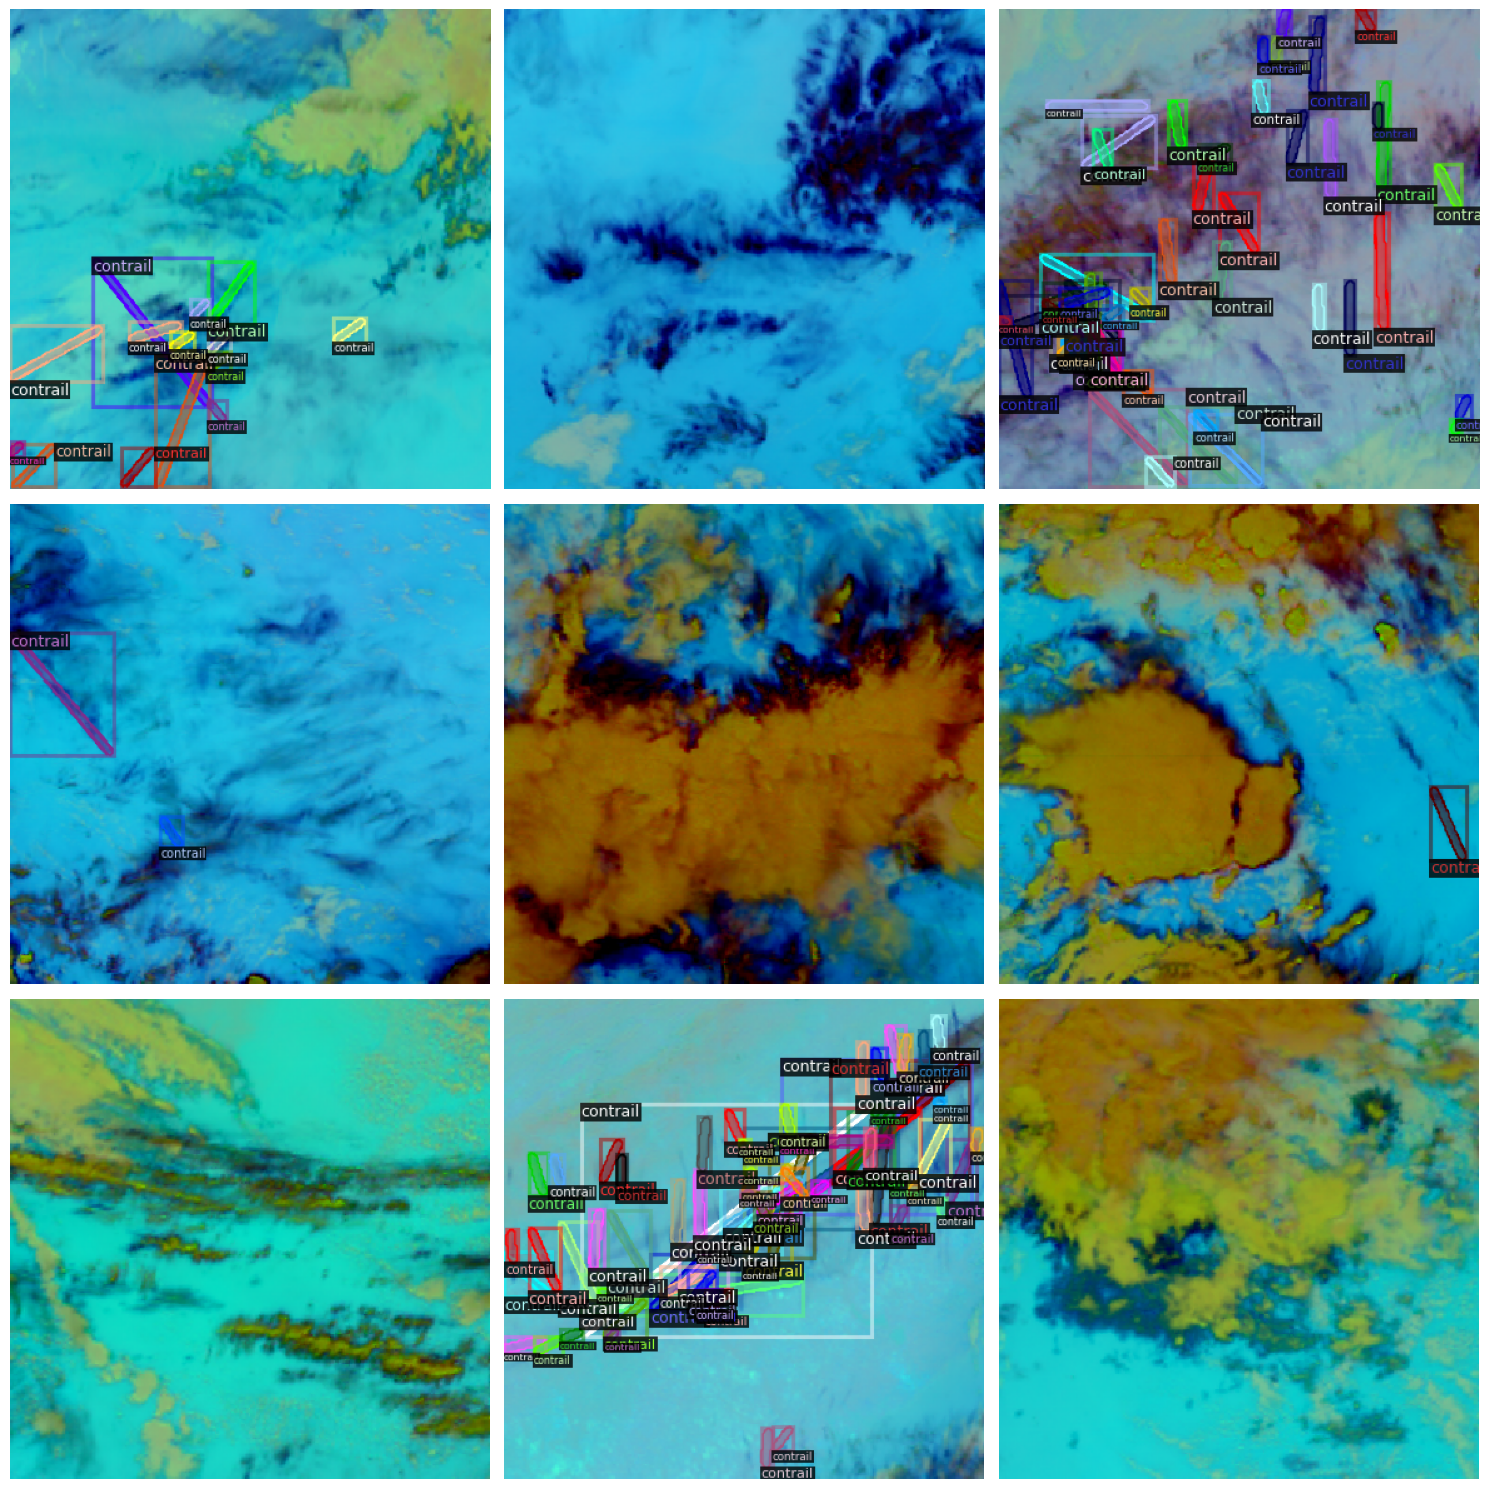

In [11]:
# Number of samples to display
num_samples = 9

# Create subplots: 3 rows × 3 columns
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Flatten axes array for easy iteration
axs = axs.flatten()

# Select random samples from the dataset
sampled_items = random.sample(dataset_dicts, num_samples)

for idx, data in enumerate(sampled_items):
    # Load the image from file
    image = cv2.imread(data["file_name"])
    filename_only = os.path.basename(data["file_name"])

    # Print the file name for reference
    print(f"Displaying: {filename_only}")

    # Initialize Detectron2 visualizer
    visualizer = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.5)
    
    # Draw annotations on the image
    output = visualizer.draw_dataset_dict(data)

    # Show image with annotations in the corresponding subplot
    axs[idx].imshow(output.get_image())
    axs[idx].axis("off")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
